In [1]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from selenium import webdriver

In [2]:
options = webdriver.ChromeOptions() 
options.add_argument("start-maximized")
options.add_argument('--disable-blink-features=AutomationControlled')

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, options=options)

[WDM] - Downloading: 100%|██████████████████████████████████████████████████████████████████████████████████████| 6.79M/6.79M [00:00<00:00, 19.8MB/s]


In [3]:
url = 'https://redplanetscience.com/'

In [4]:
browser.visit(url)

In [5]:
html = browser.html
soup = BeautifulSoup(html)
type(soup)

bs4.BeautifulSoup

In [6]:
soup = BeautifulSoup(browser.html, 'html.parser')

In [7]:
tortillas = soup.find_all('div', class_="col-md-8")
len(tortillas)

0

In [8]:
tortilla = tortillas[0]
tortilla

<div class="col-md-8">
<div class="list_text">
<div class="list_date">January 3, 2023</div>
<div class="content_title">NASA's Mars Reconnaissance Orbiter Undergoes Memory Update</div>
<div class="article_teaser_body">Other orbiters will continue relaying data from Mars surface missions for a two-week period.</div>
</div>
</div>

In [9]:
rows = []

for tortilla in tortillas: 
    title = tortilla.find("div", {"class": "content_title"}).text
    tease = tortilla.find("div", {"class": "article_teaser_body"}).text
        
    data = {'title': title, 'tease': tease}
    rows.append(data)

df = pd.DataFrame(rows)

In [10]:
df.head()

,title,tease
0,NASA's Mars Reconnaissance Orbiter Undergoes M...,Other orbiters will continue relaying data fro...
1,"While Stargazing on Mars, NASA's Curiosity Rov...",This new portrait of the Red Planet's neighbor...
2,NASA's MAVEN Maps Winds in the Martian Upper A...,Researchers have created the first map of wind...
3,Mars 2020 Stands on Its Own Six Wheels,"In time-lapse video, taken at JPL, captures th..."
4,The MarCO Mission Comes to an End,The pair of briefcase-sized satellites made hi...


In [11]:
df.to_json("mars_news.json", orient="records")

In [12]:
#Part 2

In [13]:
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html

In [8]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url2 = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

In [9]:
browser.visit(url2)

In [10]:
html = browser.html
soup = BeautifulSoup(html)
type(soup)

bs4.BeautifulSoup

In [11]:
soup = BeautifulSoup(browser.html, 'html.parser')

In [15]:
chickennoodle = soup.find("table", {"class": "table"})
noodle = table.find_all("tr", {"class": "data-row"})
len(noodle)

1867

In [16]:
column = table.find('tr').text.strip().split('\n')


In [19]:
# id: the identification number of a single transmission from the Curiosity rover
# terrestrial_date: the date on Earth
# sol: the number of elapsed sols (Martian days) since Curiosity landed on Mars    
# ls: the solar longitude    
# month: the Martian month    
# min_temp: the minimum temperature, in Celsius, of a single Martian day (sol)    
# pressure: The atmospheric pressure at Curiosity's location    

In [25]:
data2 = []

for nood in noodle:
    vals = [x.text for x in nood.find_all("td")]
    full = dict(zip(column, vals))
    data2.append(full)
    
df2 = pd.DataFrame(data2)
df2.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [28]:
df2 = df2.apply(pd.to_numeric, errors='ignore')

In [30]:
df2['terrestrial_date'] = pd.to_datetime(df2.terrestrial_date)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [ ]:
# 1. How many months are there on Mars?
# 2. How many Martian days' worth of data are there?
# 3. What is the average low temperature by month?
# Plot the average temperature by month
# Identify the coldest and hottest months in Curiosity's location
# 4. Average pressure by Martian month
# Plot the average pressure by month
# 5. How many terrestrial (earth) days are there in a Martian year?  

In [32]:
df2.month.nunique()

12

In [34]:
df2.sol.nunique()


1867

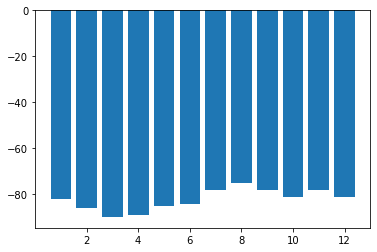

In [47]:
import matplotlib.pyplot as plt
xvalues = df2.month
yvalues = df2.min_temp

plt.bar(xvalues, yvalues)
plt.show()

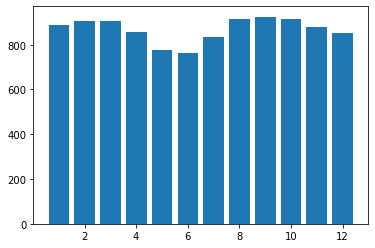

In [46]:
xvalues = df2.month
yvalues = df2.pressure

plt.bar(xvalues, yvalues)
plt.show()

In [53]:
df2.to_csv('Mars Data Table')